#Email Spam Filtering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Data set is preloaded as 'spam.csv'.

In [2]:
df= pd.read_csv('spam.csv',encoding="ISO-8859-1")

As the encoding format is different we have used 'ISO-8859-1' for encoding.

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Droping the tables that dont add much value to our analysis.

In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [6]:
df.shape

(5572, 2)


Rename the columns to make it more readable.

In [7]:
df.rename(columns={'v1':'category','v2':'messages'},inplace=True)

In [8]:
df.head()

,category,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Check the datatypes. Change it according to need.

In [9]:
df.dtypes

category    object
messages    object
dtype: object

##Analyzing the Data

Convert the category column to numbers. As they are in binary.

It will be easy using preprocessing module.

In [10]:
from sklearn import preprocessing
le_category= preprocessing.LabelEncoder()
le_category.fit(['spam','ham'])
df.category=le_category.transform(df.category)

In [11]:
df.head()

,category,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
counts=df['category'].value_counts()
counts

0    4825
1     747
Name: category, dtype: int64

Text(0.5, 1.0, 'Difference between categories')

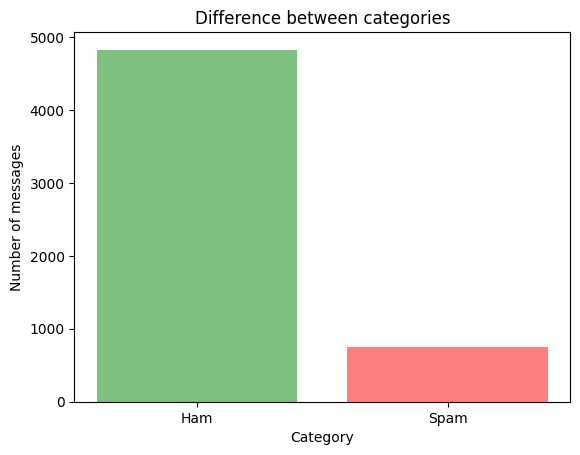

In [13]:
c=['Ham','Spam']
plt.bar(c,counts,color=['g','r'],alpha=0.5)
plt.xlabel('Category')
plt.ylabel('Number of messages')
plt.title('Difference between categories')

##Model Building

In [14]:
from sklearn.model_selection import train_test_split

We are keeping test size as 20%

In [15]:
x_train,x_test,y_train,y_test=train_test_split(df.messages,df.category,test_size=0.20,random_state=0)

In [16]:
print(f"X train size : {x_train.shape}")
print(f"Y train size : {y_train.shape}")
print(f"X test size : {x_test.shape}")
print(f"Y test size : {y_test.shape}")

X train size : (4457,)
Y train size : (4457,)
X test size : (1115,)
Y test size : (1115,)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

The TfidfVectorizer module helps to convert collection of texts into matrix which can be further used for Machine Learning Tasks.

In [18]:
feature_extraction=TfidfVectorizer(min_df=1, stop_words ='english', lowercase=True)

x_train_f=feature_extraction.fit_transform(x_train)
x_test_f= feature_extraction.transform(x_test)

In [19]:
print(x_train)

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: messages, Length: 4457, dtype: object


In [20]:
print(x_train_f)

  (0, 2400)	0.42251087562056844
  (0, 6643)	0.310713090556495
  (0, 890)	0.4431414936624499
  (0, 3102)	0.4078732191722945
  (0, 3308)	0.4607061502580205
  (0, 3697)	0.38724260113041314
  (1, 4285)	0.3619488551509563
  (1, 3709)	0.49218179847458676
  (1, 7020)	0.3597932878999011
  (1, 3022)	0.2656832920063487
  (1, 6479)	0.46190436338926344
  (1, 2530)	0.46190436338926344
  (2, 3109)	0.15859116597265116
  (2, 4045)	0.15859116597265116
  (2, 777)	0.24853230530973786
  (2, 3267)	0.3059351024463395
  (2, 6904)	0.3323889186374277
  (2, 3867)	0.22778533625897432
  (2, 7140)	0.3323889186374277
  (2, 4836)	0.2640067957824946
  (2, 6113)	0.3323889186374277
  (2, 5497)	0.39905624733507106
  (2, 4344)	0.29741887579744203
  (2, 6985)	0.3059351024463395
  (3, 2642)	0.4893788451570101
  :	:
  (4454, 5637)	0.25666584238764617
  (4454, 1470)	0.30396107829387736
  (4454, 2095)	0.24269967159421676
  (4454, 7019)	0.2053843287832964
  (4454, 3827)	0.23135590834159414
  (4454, 1497)	0.23226820104119308
  

Here, we will be using LogisticRegression model as our target dataset is a binary data set.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr=LogisticRegression()
lr

LogisticRegression()

In [23]:
print(x_train.dtype)
print(y_test.dtype)
print(x_train.dtype)
print(y_test.dtype)

object
int64
object
int64


In [24]:
lr.fit(x_train_f,y_train)

LogisticRegression()

##Model Testing

In [25]:
prediction = lr.predict(x_test_f)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
score= accuracy_score(y_test,prediction)
print(f"Accuracy score : {score}")

Accuracy score : 0.9560538116591928


We have a promising accuracy score with 95.6%.

You can also test our model with custom inputs.

In [28]:
input_your_mail=["Congratulations! You have won a free vacation to an exotic destination. Click the link to claim your prize now!"]
mail_f=feature_extraction.transform(input_your_mail)
prediction = lr.predict(mail_f)
if prediction==1:
  print("Spam")
else:
  print("Not a Spam")

Spam
